# CNN for Digit Recognizer
By : Hesham Asem

______


let's build Conv2D Neural Network , to classify tens of thousands of numbers which is in hand written format . . 

first to import needed libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten ,Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

then read the data 

In [2]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

print(f'Training Data size is : {train_data.shape}')
print(f'Test Data size is : {test_data.shape}')

Training Data size is : (42000, 785)
Test Data size is : (28000, 784)


how it looks like ? 

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


_____

# Data Processing

then we can define X & y data 

In [5]:
X = train_data.drop(['label'], axis=1, inplace=False)
y = train_data['label']

print('X shape is ' , X.shape)
print('y shape is ' , y.shape)

X shape is  (42000, 784)
y shape is  (42000,)


let's have a look to a random 20 numbers 

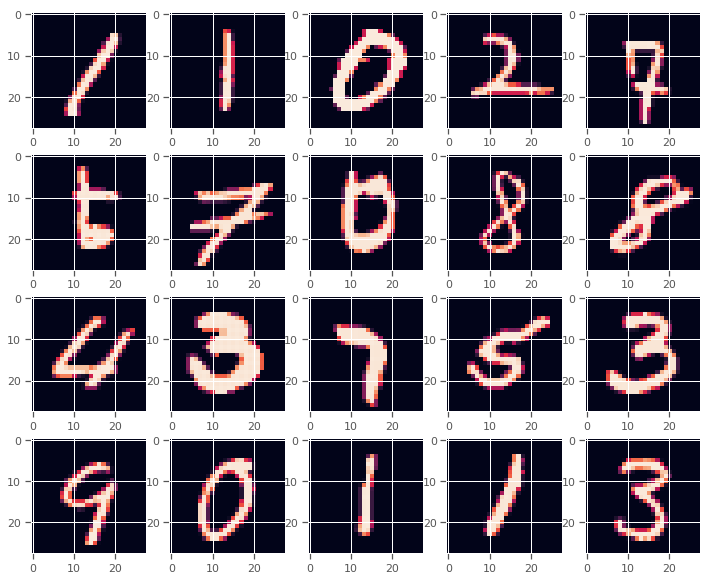

In [6]:
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
for i in  range(20)  :
    plt.subplot(4,5,i+1)
    plt.imshow(X.values[ np.random.randint(1,X.shape[0])].reshape(28,28))

we also need to be sure that output numbers are kinda equally distributed

In [7]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Ok great , let's make a pie chart for it

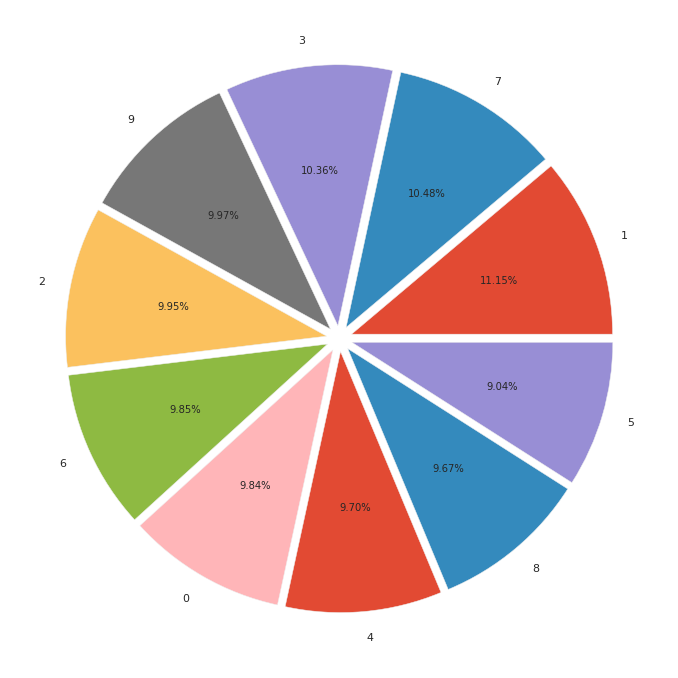

In [8]:
plt.figure(figsize=(12,12))
plt.pie(y.value_counts(),labels=list(y.value_counts().index),autopct ='%1.2f%%' ,
        labeldistance = 1.1,explode = [0.05 for i in range(len(y.value_counts()))] )
plt.show()


____

# Dimension Adjusting

it;s very important to adjust dimensions for data before building the CNN , let;s first normalize both X & test data . 

ofcourse y will not be normalized or it will mislead the training

In [9]:
X = X / 255.0
test_data = test_data / 255.0

ow how X dimension looks like

In [10]:
X.shape

(42000, 784)

then we need to reshape them , to be 4 dimensions , so first dimension will be open for all sample size , then 28 x 28 as image size , then 1

In [11]:
X = X.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

now how X dimension looks like

In [12]:
X.shape

(42000, 28, 28, 1)

and test data ? 

In [13]:
test_data.shape

(28000, 28, 28, 1)

also we have to categorize y , to convert single numbers like (7) into One Hot Matrix like [0 0 0 0 0 0 1 0 0 0]

In [14]:
ohe  = OneHotEncoder()
y = np.array(y)
y = y.reshape(len(y), 1)
ohe.fit(y)
y = ohe.transform(y).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


now how y looks like ? 

In [15]:
y.shape

(42000, 10)

____

# Data Splitting .

we have to split our data twice , first to get cross-validation data , then to get test data

so first we'll get X_part, X_cv, y_part, y_cv , then later we'll divide "part" into training & testing data

In [16]:
X_part, X_cv, y_part, y_cv = train_test_split(X, y, test_size=0.15, random_state=44, shuffle =True)

print('X_train shape is ' , X_part.shape)
print('X_test shape is ' , X_cv.shape)
print('y_train shape is ' , y_part.shape)
print('y_test shape is ' , y_cv.shape)

X_train shape is  (35700, 28, 28, 1)
X_test shape is  (6300, 28, 28, 1)
y_train shape is  (35700, 10)
y_test shape is  (6300, 10)


great , now we'll split part into train & test data , so we can test the accuracy percisely

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y_part, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (26775, 28, 28, 1)
X_test shape is  (8925, 28, 28, 1)
y_train shape is  (26775, 10)
y_test shape is  (8925, 10)


____

# Conv2D Model

now we can build our model , which will contain Conv layer then Maxpooling then normalize it 

then second layer contain Conv then Max then normalize

then drop it out with 50 %

then Flatten it 

then drop it out , then a FC with 64 units , then drop out , then last FC output layer 

In [18]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3),  activation = tf.nn.relu , padding = 'same'),
        keras.layers.MaxPool2D(pool_size=(2,2), strides=None, padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=32, kernel_size=(2,2),activation = tf.nn.relu , padding='same'),
        keras.layers.MaxPool2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),        
        keras.layers.Flatten(),    
        keras.layers.Dropout(0.5),        
        keras.layers.Dense(64),    
        keras.layers.Dropout(0.3),            
        keras.layers.Dense(units= 10,activation = tf.nn.softmax ),                

    ])

complie the model using adam optimizer & loss function : categorical crossentropy , since it's multilassifier

In [19]:
KerasModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

now we can start training for 8 epochs , without exceeding to avoid any OF

In [20]:
KerasModel.fit(X_train,y_train,validation_data=(X_cv, y_cv),epochs=8,batch_size=64,verbose=1)

Train on 26775 samples, validate on 6300 samples
Epoch 1/8
26775/26775 [==============================] - 5s 204us/step - loss: 0.8298 - acc: 0.8147 - val_loss: 0.1307 - val_acc: 0.9646
Epoch 2/8
26775/26775 [==============================] - 3s 103us/step - loss: 0.3327 - acc: 0.9132 - val_loss: 0.0925 - val_acc: 0.9738
Epoch 3/8
26775/26775 [==============================] - 3s 103us/step - loss: 0.2406 - acc: 0.9295 - val_loss: 0.0816 - val_acc: 0.9762
Epoch 4/8
26775/26775 [==============================] - 3s 104us/step - loss: 0.2052 - acc: 0.9397 - val_loss: 0.0637 - val_acc: 0.9810
Epoch 5/8
26775/26775 [==============================] - 3s 105us/step - loss: 0.1702 - acc: 0.9476 - val_loss: 0.0666 - val_acc: 0.9803
Epoch 6/8
26775/26775 [==============================] - 3s 104us/step - loss: 0.1613 - acc: 0.9506 - val_loss: 0.0641 - val_acc: 0.9800
Epoch 7/8
26775/26775 [==============================] - 3s 105us/step - loss: 0.1528 - acc: 0.9527 - val_loss: 0.0594 - val_acc:

greart . how it looks like now ? 

In [21]:
KerasModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
__________

how is accuracy for test data , which never seen by the model yet

In [22]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

8925/8925 [==============================] - 0s 56us/step
Test Loss is 0.05725349281708441
Test Accuracy is 0.9819607843137255


97% , good enough , & might be better if we increase epochs little bit

now to predict the results

In [23]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (8925, 10)


let's check random 20 samples , & we need to have a look to any mismatch images , to see why it confused

In [24]:
for i in list(np.random.randint(0,len(X_test) ,size= 20)) : 
    print(f'for sample  {i}  the predicted value is   {np.argmax(y_pred[i])}   , while the actual letter is {np.argmax(y_test[i])}')
    if np.argmax(y_pred[i]) != np.argmax(y_test[i]) : 
        print('==============================')
        print('Found mismatch . . ')
        plt.figure(figsize=(5,5))
        plt.style.use('ggplot')
        plt.imshow(X_test[i].reshape(28,28))
        plt.show()
        print('==============================')

for sample  6655  the predicted value is   7   , while the actual letter is 7
for sample  3869  the predicted value is   9   , while the actual letter is 9
for sample  6216  the predicted value is   7   , while the actual letter is 7
for sample  6798  the predicted value is   8   , while the actual letter is 8
for sample  3410  the predicted value is   2   , while the actual letter is 2
for sample  5921  the predicted value is   5   , while the actual letter is 5
for sample  135  the predicted value is   6   , while the actual letter is 6
for sample  6131  the predicted value is   8   , while the actual letter is 8
for sample  4741  the predicted value is   6   , while the actual letter is 6
for sample  1827  the predicted value is   9   , while the actual letter is 9
for sample  2864  the predicted value is   1   , while the actual letter is 1
for sample  4033  the predicted value is   3   , while the actual letter is 3
for sample  2734  the predicted value is   5   , while the actual

____

ok no mismatch found . 

now to submit the results 

In [25]:
FinalResults = KerasModel.predict(test_data)
FinalResults = pd.Series(np.argmax(FinalResults,axis = 1) ,name="Label")

FileSubmission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),FinalResults],axis = 1)
FileSubmission.to_csv("sample_submission.csv",index=False)